<a href="https://colab.research.google.com/github/SamuelRoblesArce/ModeloAdvertising-Salary/blob/main/ModeloAdvertising_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

# Modelo de Advertising

In [5]:
!pip install -U -q PyDrive

In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
downloaded = drive.CreateFile({'id':'1nO-10z73mFESbScV03fqGQ69wjRhmepr'})
downloaded.GetContentFile('Advertising.csv')

In [9]:
import pandas as pd

In [10]:
datos = pd.read_csv('Advertising.csv',sep=',',encoding='latin-1')

In [11]:
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import r2_score

In [12]:
datos.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


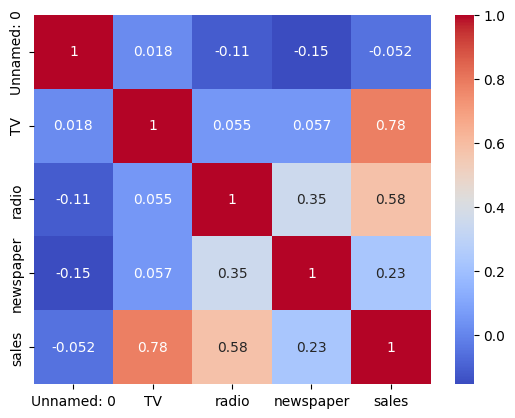

In [16]:
matrix = datos.corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.show()

## Caso (a)

Con los datos de Advertising determine el modelo lineal

$$Sales = \beta_0 + \beta_1 \times  Newspaper$$



In [17]:
x=datos['newspaper']
y=datos['sales']

In [18]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [19]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])

b0= [12.35140707]
b1= [0.0546931]


In [20]:
# Prediction
yHat = X@betas

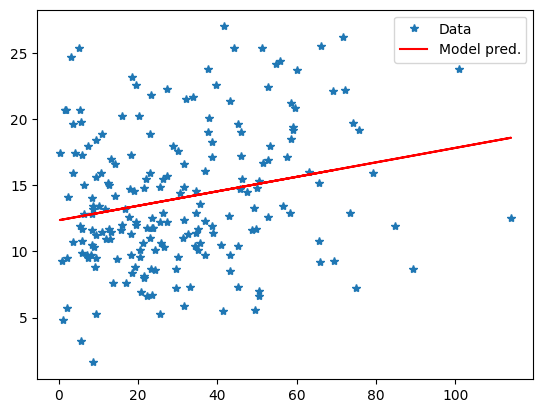

In [21]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [22]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2',coefficient_of_dermination)

MSE = 25.674022720559698
MAE = 4.146559743838488
R2 0.05212044544430516


## Caso (b)

Con los datos de Advertising determine el modelo lineal

$$Sales = \beta_0 + \beta_1 \times  Radio$$

Además, obtener el MSE y MAE asociado.

In [23]:
x=datos['radio']
y=datos['sales']

In [24]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [25]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])

b0= [9.3116381]
b1= [0.20249578]


In [26]:
# Prediction
yHat = X@betas

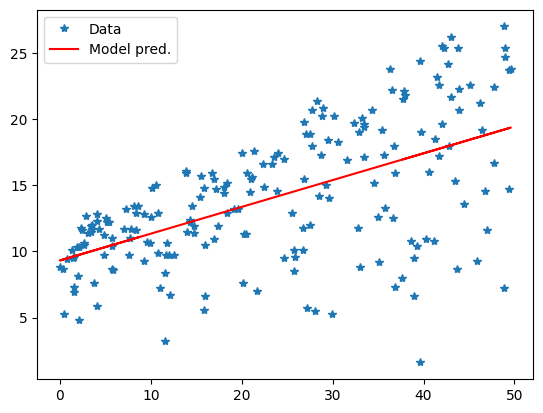

In [27]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [28]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2 =',coefficient_of_dermination)

MSE = 18.09239774512544
MAE = 3.3202187976420667
R2 = 0.33203245544529536


## Caso (c)

Con los datos de Advertising determine el modelo lineal

$$Sales = \beta_0 + \beta_1 \times  TV$$

Además, obtener el MSE y MAE asociado.

In [29]:
x=datos['TV']
y=datos['sales']

In [30]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [31]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])

b0= [7.03259355]
b1= [0.04753664]


In [32]:
# Prediction
yHat = X@betas

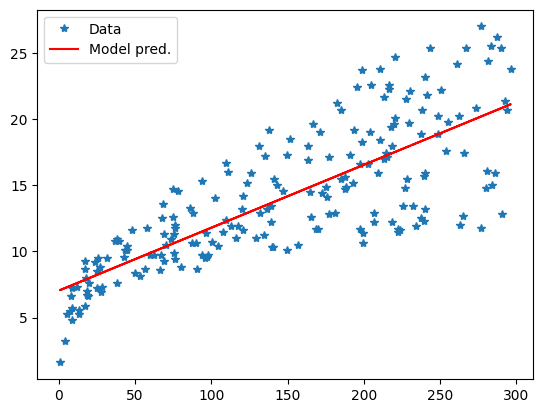

In [33]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [34]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2 =',coefficient_of_dermination)

MSE = 10.512652915656759
MAE = 2.549806038927487
R2 = 0.611875050850071


## Caso (d)

Con los datos de Advertising determine el modelo lineal

$$Sales = \beta_0 + \beta_1 \times  TV + \beta_2 \times  Radio + \beta_3 \times  Newspaper$$

Además, obtener el MSE y MAE asociado.

In [35]:
x1=datos['TV']
x2=datos['radio']
x3=datos['newspaper']
y=datos['sales']

In [36]:
x1=np.array(x1).reshape(-1,1) # Mudar para array
x2=np.array(x2).reshape(-1,1) # Mudar para array
x3=np.array(x3).reshape(-1,1) # Mudar para array

y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [37]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x1,x2,x3],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])

b0= [2.93888937]
b1= [0.04576465]
b2= [0.18853002]
b3= [-0.00103749]


In [38]:
# Prediction
yHat = X@betas

In [39]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2 =',coefficient_of_dermination)

MSE = 2.7841263145109365
MAE = 1.2520112296870707
R2 = 0.8972106381789521


## Caso (e)

Con los datos de Advertising determine el modelo lineal

$$Sales = \beta_0 + \beta_1 \times  TV + \beta_2 \times  Radio + \beta_3 \times  TV \times  Radio$$

Además, obtener el MSE y MAE asociado.

In [40]:
x1=datos['TV']
x2=datos['radio']
x3=datos['TV']*datos['radio']
y=datos['sales']

In [41]:
x1=np.array(x1).reshape(-1,1) # Mudar para array
x2=np.array(x2).reshape(-1,1) # Mudar para array
x3=np.array(x3).reshape(-1,1) # Mudar para array

y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [42]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x1,x2,x3],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])

b0= [6.7502202]
b1= [0.01910107]
b2= [0.02886034]
b3= [0.00108649]


In [43]:
# Prediction
yHat = X@betas

In [44]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2 =',coefficient_of_dermination)

MSE = 0.8724169131386358
MAE = 0.6604837217764878
R2 = 0.9677905498482523


# Predictor de Salario
Usar el conjunto de datos Salary_dataset y determinar los modelos de regresión polinomial de la forma:


$$Salary = \beta_0 + \beta_1 \times  \text{YearsExperience} + \beta_1 \times  \text{YearsExperience}^{2}+ \cdots + \beta_P\text{YearsExperience}^{P} $$

Evaluar para cada $P=1,2,3,4,5$ en función del MSE, MAE y $R^2$


In [45]:
downloaded = drive.CreateFile({'id':'1jZOUBQRgKZT6o1omztXV2ndx-_JcIsak'})
downloaded.GetContentFile('Salary_dataset.csv')
datos2 = pd.read_csv('Salary_dataset.csv',sep=',',encoding='latin-1')
datos2=datos2[['YearsExperience','Salary']]
datos2.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


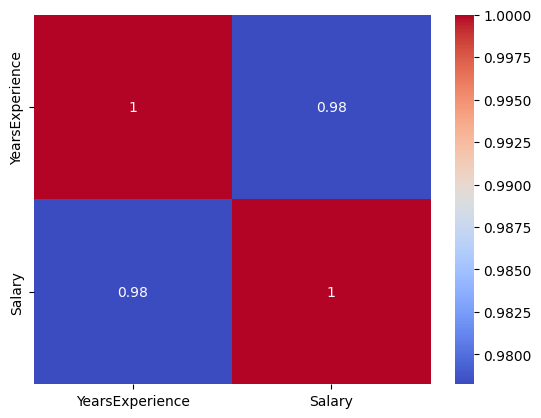

In [46]:
matrix2 = datos2.corr()

# plotting correlation matrix
sns.heatmap(matrix2, cmap="coolwarm", annot=True)
plt.show()

In [47]:
# Normalize
datos2['YearsExperience_normalized'] = datos2['YearsExperience'] / np.linalg.norm(datos2['YearsExperience'])
datos2['Salary_normalized'] = datos2['Salary'] / np.linalg.norm(datos2['Salary'])

print(datos2.head())

   YearsExperience   Salary  YearsExperience_normalized  Salary_normalized
0              1.2  39344.0                    0.035975           0.089075
1              1.4  46206.0                    0.041970           0.104611
2              1.6  37732.0                    0.047966           0.085426
3              2.1  43526.0                    0.062956           0.098543
4              2.3  39892.0                    0.068951           0.090316


In [48]:
datos2['YearsExperience_normalized2'] = np.log(datos2['YearsExperience'])
datos2['Salary_normalized2'] = np.log(datos2['Salary'])

print(datos2.head())

   YearsExperience   Salary  YearsExperience_normalized  Salary_normalized  \
0              1.2  39344.0                    0.035975           0.089075   
1              1.4  46206.0                    0.041970           0.104611   
2              1.6  37732.0                    0.047966           0.085426   
3              2.1  43526.0                    0.062956           0.098543   
4              2.3  39892.0                    0.068951           0.090316   

   YearsExperience_normalized2  Salary_normalized2  
0                     0.182322           10.580099  
1                     0.336472           10.740865  
2                     0.470004           10.538264  
3                     0.741937           10.681114  
4                     0.832909           10.593931  


## P1

In [49]:
x=datos2['YearsExperience']
y=datos2['Salary']

In [50]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [51]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])

b0= [24848.20396652]
b1= [9449.96232146]


In [52]:
# Prediction
yHat = X@betas

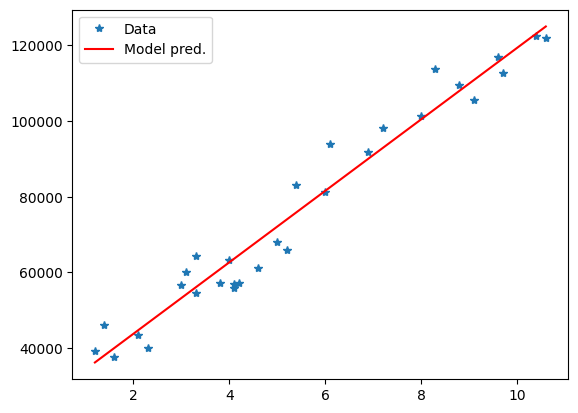

In [53]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [54]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2',coefficient_of_dermination)

MSE = 31270951.722280946
MAE = 4644.201289443537
R2 0.9569566641435086


## P2

In [55]:
x=datos2['YearsExperience']
y=datos2['Salary']

In [56]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [57]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])

b0= [25290.1682139]
b1= [9256.00537494]
b2= [16.39256632]


In [58]:
# Prediction
yHat = X@betas

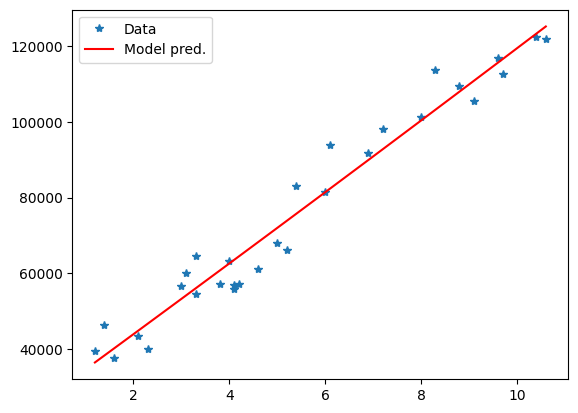

In [59]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [60]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 31257508.45094719
MAE = 4653.069044746794
R^2= 0.956975168321065


## P3

In [61]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])

b0= [38957.05912647]
b1= [-1142.26626586]
b2= [2136.22657061]
b3= [-122.91541434]


In [62]:
# Prediction
yHat = X@betas

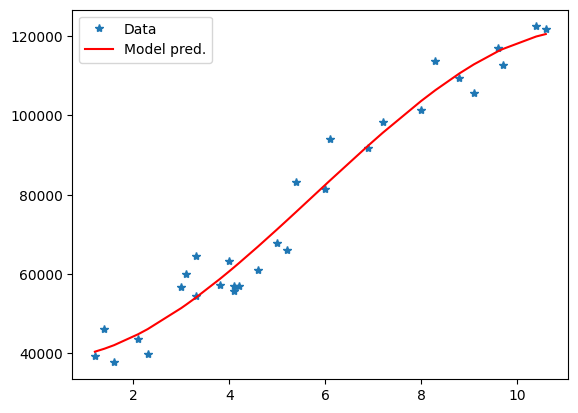

In [63]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [64]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 26446769.606837768
MAE = 4269.070457553549
R^2= 0.9635969766249464


## P4

In [65]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3,x**4],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])
print('b4=',betas[4])

b0= [41527.20924163]
b1= [-3917.3462211]
b2= [3051.18354255]
b3= [-238.55611829]
b4= [4.92429166]


In [66]:
# Prediction
yHat = X@betas

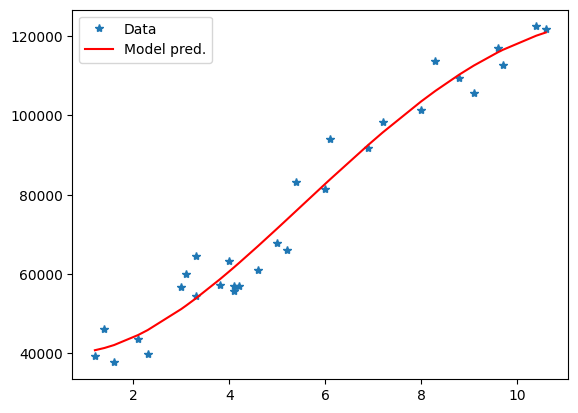

In [67]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [68]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 26403845.62388004
MAE = 4265.608949008578
R^2= 0.9636560599375092


## P5

In [69]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3,x**4,x**5],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])
print('b4=',betas[4])
print('b5=',betas[5])

b0= [3752.68273328]
b1= [47659.51237271]
b2= [-20716.5524746]
b3= [4583.25809393]
b4= [-437.6287511]
b5= [15.00642077]


In [70]:
# Prediction
yHat = X@betas

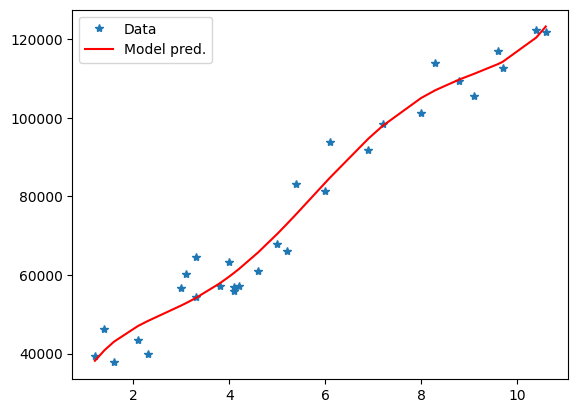

In [71]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [72]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 24297997.74883127
MAE = 4126.050957208505
R^2= 0.966554683495673


## P1 Normalizado

In [73]:
x=datos2['YearsExperience_normalized']
y=datos2['Salary_normalized']

In [74]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [75]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])

b0= [0.05625666]
b1= [0.71366456]


In [76]:
# Prediction
yHat = X@betas

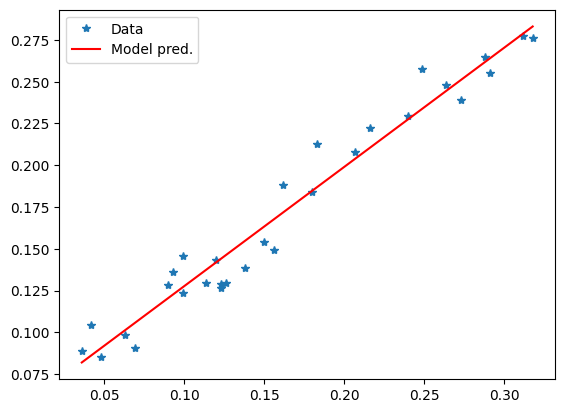

In [77]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [78]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R2',coefficient_of_dermination)

MSE = 0.00016028723084092865
MAE = 0.010514532026457626
R2 0.9569566641435086


## P2 Normalizado

In [79]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])

b0= [0.05725727]
b1= [0.69901686]
b2= [0.04129487]


In [80]:
# Prediction
yHat = X@betas

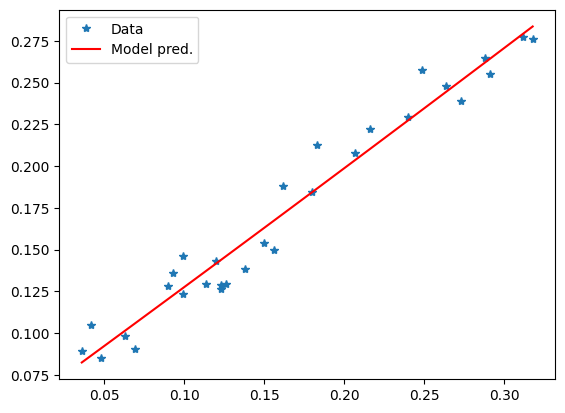

In [81]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [82]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 0.00016021832392838341
MAE = 0.010534608739616275
R^2= 0.956975168321065


## P3 Normalizado

In [83]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])

b0= [0.08819929]
b1= [-0.08626436]
b2= [5.38141528]
b3= [-10.32858162]


In [84]:
# Prediction
yHat = X@betas

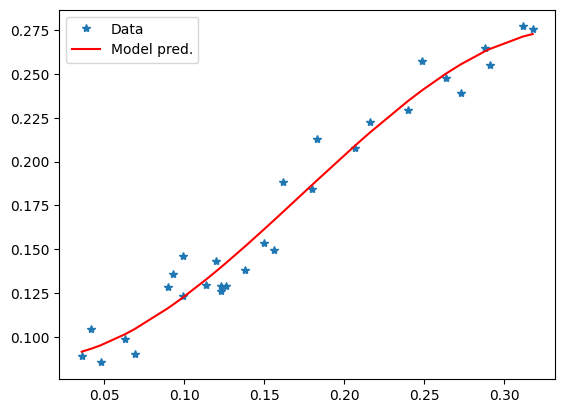

In [85]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [86]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 0.00013555965621435382
MAE = 0.009665230951805971
R^2= 0.9635969766249463


## P4 Normalizado

In [87]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3,x**4],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])
print('b4=',betas[4])

b0= [0.09401814]
b1= [-0.2958394]
b2= [7.68630349]
b3= [-20.04586936]
b4= [13.80267444]


In [88]:
# Prediction
yHat = X@betas

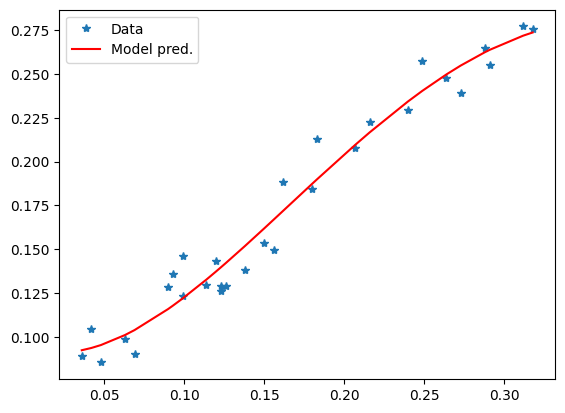

In [89]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [90]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 0.00013533963840274197
MAE = 0.009657394051511064
R^2= 0.9636560599375092


## P5 Normalizado

In [91]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3,x**4,x**5],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])
print('b4=',betas[4])
print('b5=',betas[5])

b0= [0.00849612]
b1= [3.59926355]
b2= [-52.18752244]
b3= [385.13115332]
b4= [-1226.66316261]
b5= [1403.07775001]


In [92]:
# Prediction
yHat = X@betas

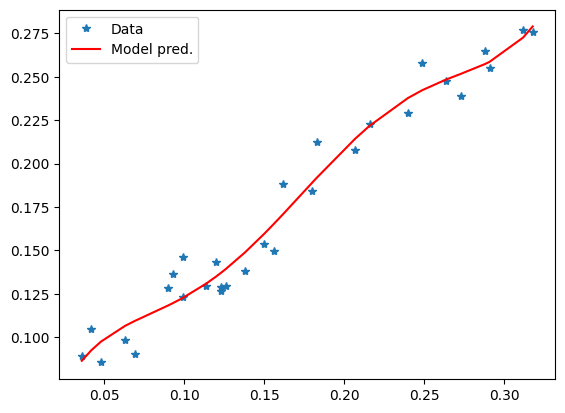

In [93]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [94]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 0.00012454557855251058
MAE = 0.009341432945839391
R^2= 0.9665546834956744


## P5 log

In [95]:
x=datos2['YearsExperience_normalized2']
y=datos2['Salary_normalized2']

In [96]:
x=np.array(x).reshape(-1,1) # Mudar para array
y=np.array(y).reshape(-1,1) # Mudar para array
N = len(y)

In [97]:
# Computing Matrix X
X = np.concatenate( [np.ones([N,1]),x,x**2,x**3,x**4,x**5],axis=1)

# Solving X.t*X*betas=X.t*b
betas = np.linalg.solve(X.T@X,X.T@y)

print('b0=',betas[0])
print('b1=',betas[1])
print('b2=',betas[2])
print('b3=',betas[3])
print('b4=',betas[4])
print('b5=',betas[5])

b0= [10.81860355]
b1= [-1.59510469]
b2= [3.7221755]
b3= [-3.35485009]
b4= [1.46316737]
b5= [-0.23751455]


In [98]:
# Prediction
yHat = X@betas

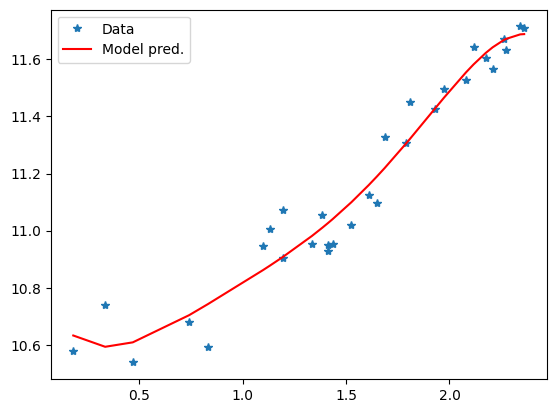

In [99]:
# Plot data and model prediction
plt.plot(x,y,'*',label='Data')
plt.plot(x,yHat,'r',label='Model pred.')

plt.legend()
plt.show()

In [100]:
print('MSE =',((yHat-y)**2).sum()/N)
print('MAE =',abs(yHat-y).sum()/N)
coefficient_of_dermination = r2_score(y, yHat)
print('R^2=',coefficient_of_dermination)

MSE = 0.006220607698108187
MAE = 0.0632880557145007
R^2= 0.9526829614536914
